## **Exercise 1**

1.1 Consider some continuous random variables generated from an unknown distribution stored in 'clean_data.npy'. Fit a univariate Gaussian distribution to this data and estimate the mean and variance of the Gaussian distribution using the maximum likelihood estimator. Report the estimated mean and variance for the Gaussian distribution and plot its probability density function for continuous random variables in the range $[-10, 20]$. Overlay this probability density function curve on the normalised histogram of the data.

**(5 marks)**


In [84]:
import numpy as np
import pandas as pd
data = np.load('clean_data.npy', allow_pickle=True)

df = pd.DataFrame(data)
df.head()
print(df)

       0        1         2         3         4         5         6     \
0  2.227386  9.61436  3.858638  2.265447  2.168993  2.743786  7.435449   

        7         8         9     ...      9990      9991      9992      9993  \
0  11.138449 -0.123204  2.220205  ...  9.508221  9.836647  4.943785  3.399333   

       9994      9995      9996      9997       9998     9999  
0  4.485518  6.647458  5.995327  7.753622  10.614776  3.31716  

[1 rows x 10000 columns]


In [85]:
N = len(data)

mean_mle = np.mean(data)

variance_mle = np.var(data, ddof=1)  

print(f'Mean: {mean_mle}')
print(f'Variance: {variance_mle}')

Mean: 5.027152443622421
Variance: 9.029570275802165


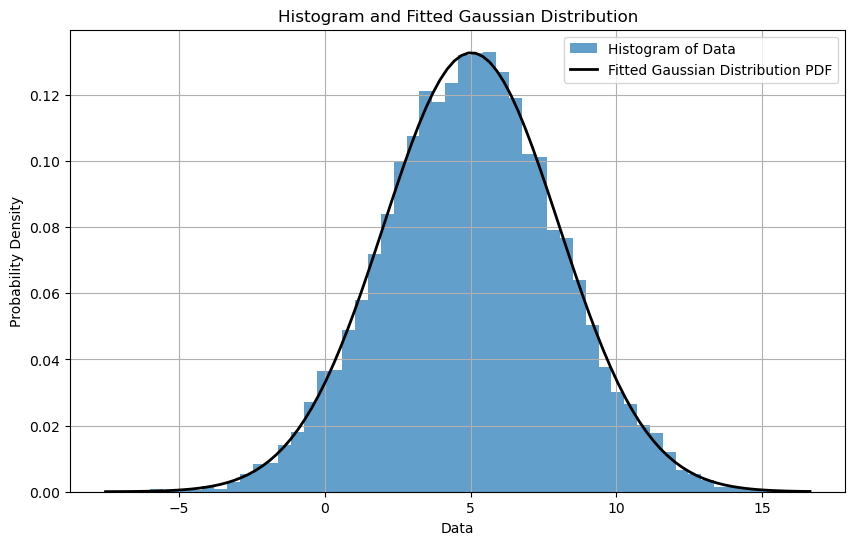

In [86]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Transpose the DataFrame to treat columns as individual data points
df_transposed = df.T

# Plot the histogram of the data
df_transposed.hist(bins=50, density=True, alpha=0.7, figsize=(10, 6), label='Histogram of Data')

# Plot the fitted Gaussian distribution
xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 100)
pdf_curve = norm.pdf(x_range, mean_mle, np.sqrt(variance_mle))
plt.plot(x_range, pdf_curve, 'k', linewidth=2, label='Fitted Gaussian Distribution PDF')

plt.title('Histogram and Fitted Gaussian Distribution')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


1.2 Next, consider a 'corrupted' version of the data used in the previous exercise, stored in 'corrupted_data.npy'. This new data is affected by some degree of outliers from an unknown source. Repeat the process of fitting a univariate Gaussian distribution to this new data (using MLE) and report the estimated mean and variance of the distribution. Plot its probability density function for continuous random variables in the range $[-10, 35]$. Overlay this probability density function curve on the normalised histogram of the new data (affected by outliers). Comment on how the new Gaussian distribution parameters estimated have changed relative to the previous values estimated in exercise 1.1, and why.

**(5 marks)**

In [87]:
import numpy as np
import pandas as pd
data = np.load('corrupted_data.npy', allow_pickle=True)

df = pd.DataFrame(data)
df.head()
print(df)

               0
0       2.227386
1       9.614360
2       3.858638
3       2.265447
4       2.168993
...          ...
10995  21.628882
10996  21.681941
10997  22.847658
10998  20.882122
10999  22.404448

[11000 rows x 1 columns]


In [47]:
import matplotlib.pyplot as plt
from scipy.stats import norm

N = len(data)
mean_mle = np.mean(data)
variance_mle = np.var(df, ddof=1).values[0]

# Display the results
print(f'Mean: {mean_mle}')
print(f'Variance: {variance_mle}')

Mean: 6.614508398212064
Variance: 33.61491302420983


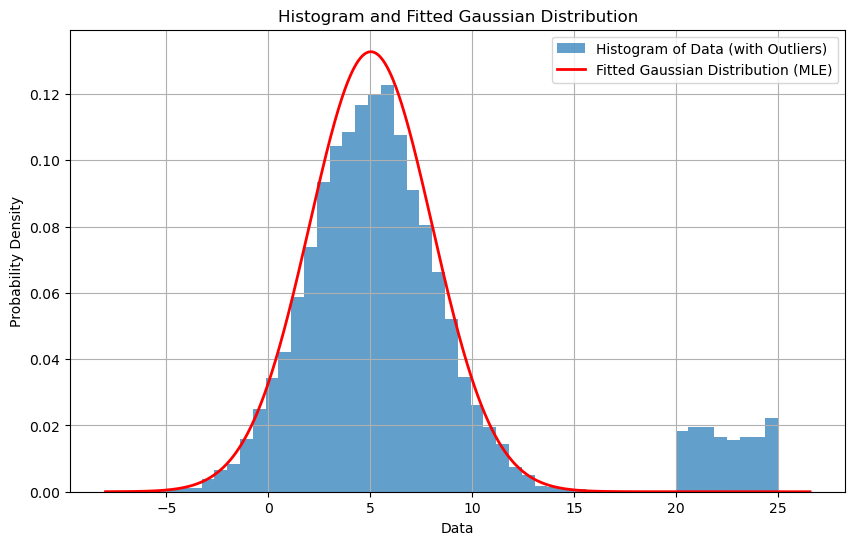

In [89]:
df.hist(bins=50, density=True, alpha=0.7, figsize=(10, 6), label='Histogram of Data (with Outliers)')

xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 1000)
pdf_curve_mle = norm.pdf(x_range, mean_mle, np.sqrt(variance_mle))
plt.plot(x_range, pdf_curve_mle, 'r', linewidth=2, label='Fitted Gaussian Distribution (MLE)')

plt.title('Histogram and Fitted Gaussian Distribution')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

EXPLANATION:
The mean of the gaussian distribution in this exercise 1.2 is higher than the mean in exercise 1.1, which indicates a shift in the location or distribution of the data. The variance of the gaussian distribution is significantly higher compared to the first in exercise 1.1. This means that the data points from 'corrupted_data.npy' are much more spread out compared to data in 'clean_data.npy'. These would be due to the presence of outliers in 'corrupted_data.npy', which would disproportionately influence the data.

1.3 Fit a distribution to the corrupted data from exercise 1.2 in a manner that is robust to the outliers present. Demonstrate this robustness by comparing the probability density functions of the robust and univariate Gaussian distribution for the corrupted data. Additionally compare the mean and variance estimated for both the clean data (from exercise 1.1) and the corrupted data (from exercise 1.2) based on the robust fit. Explain briefly, how your chosen approach to fitting a robust distribution to the corrupted data achieves robustness.

**(5 marks)**

In [90]:
import numpy as np
import pandas as pd
data = np.load('corrupted_data.npy', allow_pickle=True)

df = pd.DataFrame(data)
df.head()
print(df)

               0
0       2.227386
1       9.614360
2       3.858638
3       2.265447
4       2.168993
...          ...
10995  21.628882
10996  21.681941
10997  22.847658
10998  20.882122
10999  22.404448

[11000 rows x 1 columns]


In [91]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming df is a Pandas DataFrame with the new data (11000 rows, 1 column)
# Transpose the DataFrame to treat columns as individual data points
df_transposed = df.T

# Robust estimators for mean and variance using median and MAD
median_data = np.median(df_transposed)
mad_data = np.median(np.abs(df_transposed - median_data)) * 1.4826  # Scaling factor for normal distribution

# Robust estimators for mean and variance using median and MAD
mean_mle_robust = median_data
variance_mle_robust = mad_data**2

# Display the results
print(f'Robust Mean: {mean_mle_robust}')
print(f'Robust Variance: {variance_mle_robust}')

Robust Mean: 5.410667961396163
Robust Variance: 11.53044687699028


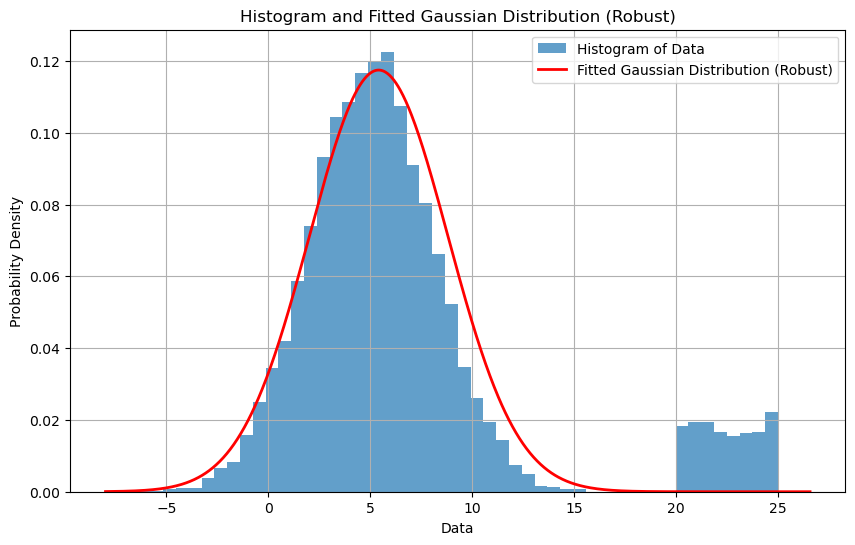

In [92]:
import matplotlib.pyplot as plt
from scipy.stats import norm

df.hist(bins=50, density=True, alpha=0.7, figsize=(10, 6), label='Histogram of Data')

xmin, xmax = plt.xlim()
x_range = np.linspace(xmin, xmax, 1000)
pdf_curve_robust = norm.pdf(x_range, mean_mle_robust, np.sqrt(variance_mle_robust))
plt.plot(x_range, pdf_curve_robust, 'r', linewidth=2, label='Fitted Gaussian Distribution (Robust)')

plt.title('Histogram and Fitted Gaussian Distribution (Robust)')
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


EXPLANATION:
The probability density function of the robust gaussian distribution for the corrupted data shows a more accurate representation of the data by minimizing the presence of outliers on the shape of the probabilty density function. The robust mean is close to the mean of the clean data, and its variance is significantly lower than that of the corrupted data.
The robust approach uses median and median absolute deviation to estimate the central limit. The median is less sensitive to extreme values than mean, and the median absolute deviation is less influenced by outliers.

# **Exercise 2**

2.1 You are given a data array called "shape_array.npy" that comprises 7 samples organised as columns in the array. Each column vector is a 3D shape of a blood vessel of size $(N\times3)$ that has been reshaped into a vector of size $(N*3 \times 1)$. Perform PCA (using the scikit-learn implementation) of the data array and extract the principal components (eigenvectors), the coordinates of the shapes in the new co-ordinate space defined by the eigenvectors, and the singular values associated with each of the eigenvectors.

**(5 marks)**

In [94]:
import numpy as np
import pandas as pd

data = np.load('shape_array.npy', allow_pickle=True)

df = pd.DataFrame(data)
df.head()
print(df)

             0         1         2         3         4         5         6
0     0.001861  0.003124  0.000412  0.002297  0.001209  0.002301  0.002347
1    -0.009046 -0.006161 -0.004609 -0.005295 -0.009945 -0.007948 -0.010473
2    -0.001147  0.001947 -0.000153 -0.002682 -0.001702 -0.000198 -0.002508
3     0.000833  0.002470 -0.000861  0.000911  0.000005  0.001451  0.001285
4    -0.009118 -0.005852 -0.004535 -0.005350 -0.010473 -0.007742 -0.011285
...        ...       ...       ...       ...       ...       ...       ...
1840 -0.001567  0.000916  0.000796 -0.001193 -0.002732 -0.001052 -0.000534
1841 -0.022884 -0.023543 -0.024486 -0.024401 -0.021593 -0.023269 -0.022740
1842  0.000164 -0.001482  0.000555  0.000780  0.003223 -0.000134  0.001733
1843 -0.003091 -0.000388 -0.000653 -0.003456 -0.004238 -0.002797 -0.002531
1844 -0.021625 -0.023071 -0.024042 -0.023265 -0.019687 -0.022750 -0.022018

[1845 rows x 7 columns]


In [95]:
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(df)

eigenvectors = pca.components_

coordinates = principal_components

singular_values = pca.singular_values_

print("Principal Components (Eigenvectors):\n", eigenvectors)
print("\nCoordinates of Shapes in New Coordinate Space:\n", coordinates)
print("\nSingular Values associated with each Eigenvector:\n", singular_values)

Principal Components (Eigenvectors):
 [[-0.3803727  -0.3752308  -0.3771994  -0.3781714  -0.37574723 -0.3805931
  -0.37840298]
 [-0.10408949  0.5782455   0.42631048  0.0425504  -0.5881822   0.0017551
  -0.35395625]
 [ 0.16878529  0.5200731  -0.3181613  -0.70664847  0.25168657  0.17260835
  -0.085539  ]
 [-0.19174086  0.06954233 -0.27825055  0.4181914   0.34790322  0.32721785
  -0.6913635 ]
 [ 0.19346637  0.24013233 -0.7006812   0.36210415 -0.44749323  0.06895246
   0.27897862]
 [ 0.85081685 -0.2906571   0.05269554 -0.04612325 -0.16009541 -0.01326348
  -0.4011462 ]
 [ 0.13382934  0.32768428 -0.05999374  0.21838728  0.32029992 -0.84460074
  -0.08647648]]

Coordinates of Shapes in New Coordinate Space:
 [[-5.1102061e-03  3.4573066e-04  6.8627525e-04 ...  1.9254988e-03
  -5.7587412e-04 -9.7920929e-06]
 [ 2.0230768e-02  4.7289883e-03 -2.5007613e-03 ... -9.3817769e-04
  -7.2454400e-06  3.2279457e-04]
 [ 2.4545188e-03  2.9521289e-03  2.5158895e-03 ... -5.7056191e-04
  -1.4625398e-04 -2.5354192

2.2 Next, perform eigendecomposition of the covariance matrix estimated from the given data array. Compare the obtained eigenvalues with the singular values estimated from PCA in the previous step. Report any differences you might find between the two and briefly explain the reason for any differences. Find the new coordinates of each shape (i.e. column in the data array) in the new coordinate space defined by the estimated eigenvectors.

**(5 marks)**

In [96]:
covariance_matrix = np.cov(df, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Covariance Matrix:\n", covariance_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Covariance Matrix:
 [[5.41507275e-05 5.31171070e-05 5.32693319e-05 5.34804075e-05
  5.35206484e-05 5.40100141e-05 5.38596794e-05]
 [5.31171070e-05 5.41356922e-05 5.34327966e-05 5.26171833e-05
  5.14764980e-05 5.33973795e-05 5.21653274e-05]
 [5.32693319e-05 5.34327966e-05 5.40946611e-05 5.34105580e-05
  5.19110340e-05 5.34284027e-05 5.27347907e-05]
 [5.34804075e-05 5.26171833e-05 5.34105580e-05 5.41110194e-05
  5.27038225e-05 5.36066301e-05 5.33049135e-05]
 [5.35206484e-05 5.14764980e-05 5.19110340e-05 5.27038225e-05
  5.41664650e-05 5.34304018e-05 5.36315495e-05]
 [5.40100141e-05 5.33973795e-05 5.34284027e-05 5.36066301e-05
  5.34304018e-05 5.41472552e-05 5.36073391e-05]
 [5.38596794e-05 5.21653274e-05 5.27347907e-05 5.33049135e-05
  5.36315495e-05 5.36073391e-05 5.41572013e-05]]

Eigenvalues:
 [3.73037469e-04 3.70862164e-06 1.24675147e-06 3.26716550e-08
 9.81054237e-08 4.68177310e-07 3.71225469e-07]

Eigenvectors:
 [[ 0.38037267 -0.10408952 -0.16878517  0.13382929 -0.85081701  0.19174

The obtained eigenvalues here are much smaller than the singular values estimated from PCA in the previous step. This difference is due to the squared nature of the eigenvalues. The eigenvalues are the squares of the corresponding singular values.

2.3 Reconstruct any one shape from the provided data array using (a) new coordinates estimated from PCA in 2.1 and (b) the new coordinates estimated using eigendecomposition in 2.2. Reshape the resulting vectors from (a) and (b) into a 3D set of points of size $(N\times3)$ that represent reconstructions of the original shape. Overlay the two resulting shapes and briefly comment on their similarity. Finally, in a couple of sentences explain why PCA is often described as an approach for dimensionality reduction/data compression.

**(5 marks)**

In [97]:
#New coordinates estimated from PCA in 2.1 
selected_pca_coordinates = coordinates[0]

reconstructed_shape_pca = pca.inverse_transform(selected_pca_coordinates)

reconstructed_shape_pca = reconstructed_shape_pca.reshape((len(reconstructed_shape_pca), 1))

print("Reconstructed Shape using PCA Coordinates:\n", reconstructed_shape_pca)

#New coordinates estimated using eigendecomposition in 2.2
selected_eigendecomp_coordinates = eigenvectors[:, 0]

reconstructed_shape_eigendecomp = selected_eigendecomp_coordinates * singular_values[0]

reconstructed_shape_eigendecomp = reconstructed_shape_eigendecomp.reshape((len(reconstructed_shape_eigendecomp), 1))

print("Reconstructed Shape using Eigendecomposition Coordinates:\n", reconstructed_shape_eigendecomp)

Reconstructed Shape using PCA Coordinates:
 [[0.00186121]
 [0.00312417]
 [0.0004117 ]
 [0.00229733]
 [0.00120914]
 [0.00230085]
 [0.00234746]]
Reconstructed Shape using Eigendecomposition Coordinates:
 [[0.31547577]
 [0.31121111]
 [0.31284394]
 [0.31365002]
 [0.31163927]
 [0.31565856]
 [0.31384197]]


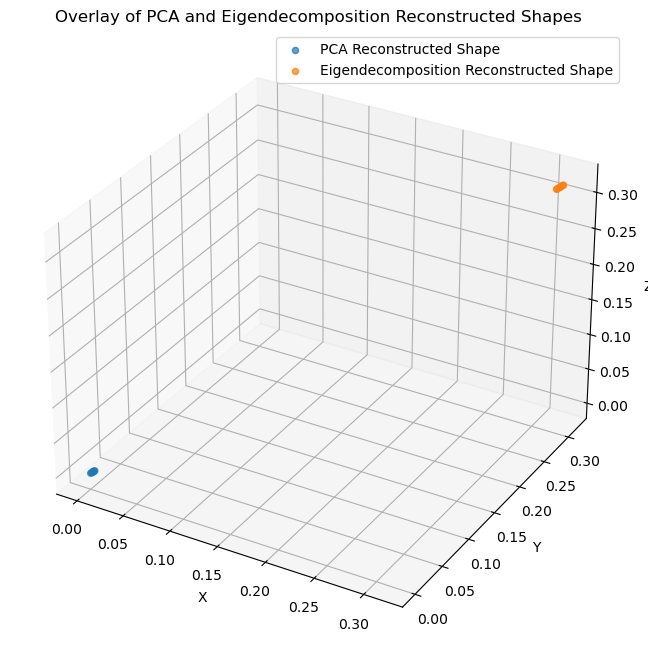

In [79]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reshape the resulting vectors into a 3D set of points
reconstructed_shape_pca_3d = reconstructed_shape_pca.reshape((len(reconstructed_shape_pca), 1, 1))
reconstructed_shape_eigendecomp_3d = reconstructed_shape_eigendecomp.reshape((len(reconstructed_shape_eigendecomp), 1, 1))

# Create a figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Overlay the two resulting shapes
ax.scatter(reconstructed_shape_pca_3d[:, 0, 0], reconstructed_shape_pca_3d[:, 0, 0], reconstructed_shape_pca_3d[:, 0, 0], label='PCA Reconstructed Shape', alpha=0.7)
ax.scatter(reconstructed_shape_eigendecomp_3d[:, 0, 0], reconstructed_shape_eigendecomp_3d[:, 0, 0], reconstructed_shape_eigendecomp_3d[:, 0, 0], label='Eigendecomposition Reconstructed Shape', alpha=0.7)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Overlay of PCA and Eigendecomposition Reconstructed Shapes')

# Add legend
ax.legend()

# Show the plot
plt.show()


PCA is seen as an approach for dimensionality reduction and data compression because it transforms a high-dimensional dataset into a lower-dimensional representation by capturing the maximum variance along its principal components. The lower-dimensional representation retains the most significant information from the original data, reducing redundancy and allowing for more efficient storage and analysis while minimizing information loss.

# **Exercise 3: Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.


The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [98]:
import os
import pandas as pd

training_data_path = 'Training_data.csv'
training_targets_path ='Training_data_targets.csv'

**Exercise 3.1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other.

**(5 marks)**

In [99]:
df1 = pd.read_csv(training_data_path)
print(df1)

      avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0       59.000000                30     404.300000      33975        8251   
1      114.000000                41     403.800000      47363       22702   
2       33.000000                11     352.000000      77222        9899   
3      254.000000               100     429.600000      80650       48904   
4       75.000000                32     407.500000      42839       22255   
...           ...               ...            ...        ...         ...   
2433   335.000000               155     445.700000      41608       61109   
2434   113.000000                37     497.300000      61259       17299   
2435   571.000000               210     457.200000      49790      118212   
2436  1962.667684                 7     453.549422      50886        2640   
2437   741.000000               308     478.400000      45556      119980   

      povertyPercent  studyPerCap  MedianAge  MedianAgeMale  MedianAgeFemal

array([[<Axes: title={'center': 'avgAnnCount'}>,
        <Axes: title={'center': 'avgDeathsPerYear'}>,
        <Axes: title={'center': 'incidenceRate'}>,
        <Axes: title={'center': 'medIncome'}>,
        <Axes: title={'center': 'popEst2015'}>,
        <Axes: title={'center': 'povertyPercent'}>],
       [<Axes: title={'center': 'studyPerCap'}>,
        <Axes: title={'center': 'MedianAge'}>,
        <Axes: title={'center': 'MedianAgeMale'}>,
        <Axes: title={'center': 'MedianAgeFemale'}>,
        <Axes: title={'center': 'AvgHouseholdSize'}>,
        <Axes: title={'center': 'PercentMarried'}>],
       [<Axes: title={'center': 'PctNoHS18_24'}>,
        <Axes: title={'center': 'PctHS18_24'}>,
        <Axes: title={'center': 'PctSomeCol18_24'}>,
        <Axes: title={'center': 'PctBachDeg18_24'}>,
        <Axes: title={'center': 'PctHS25_Over'}>,
        <Axes: title={'center': 'PctBachDeg25_Over'}>],
       [<Axes: title={'center': 'PctEmployed16_Over'}>,
        <Axes: title={'ce

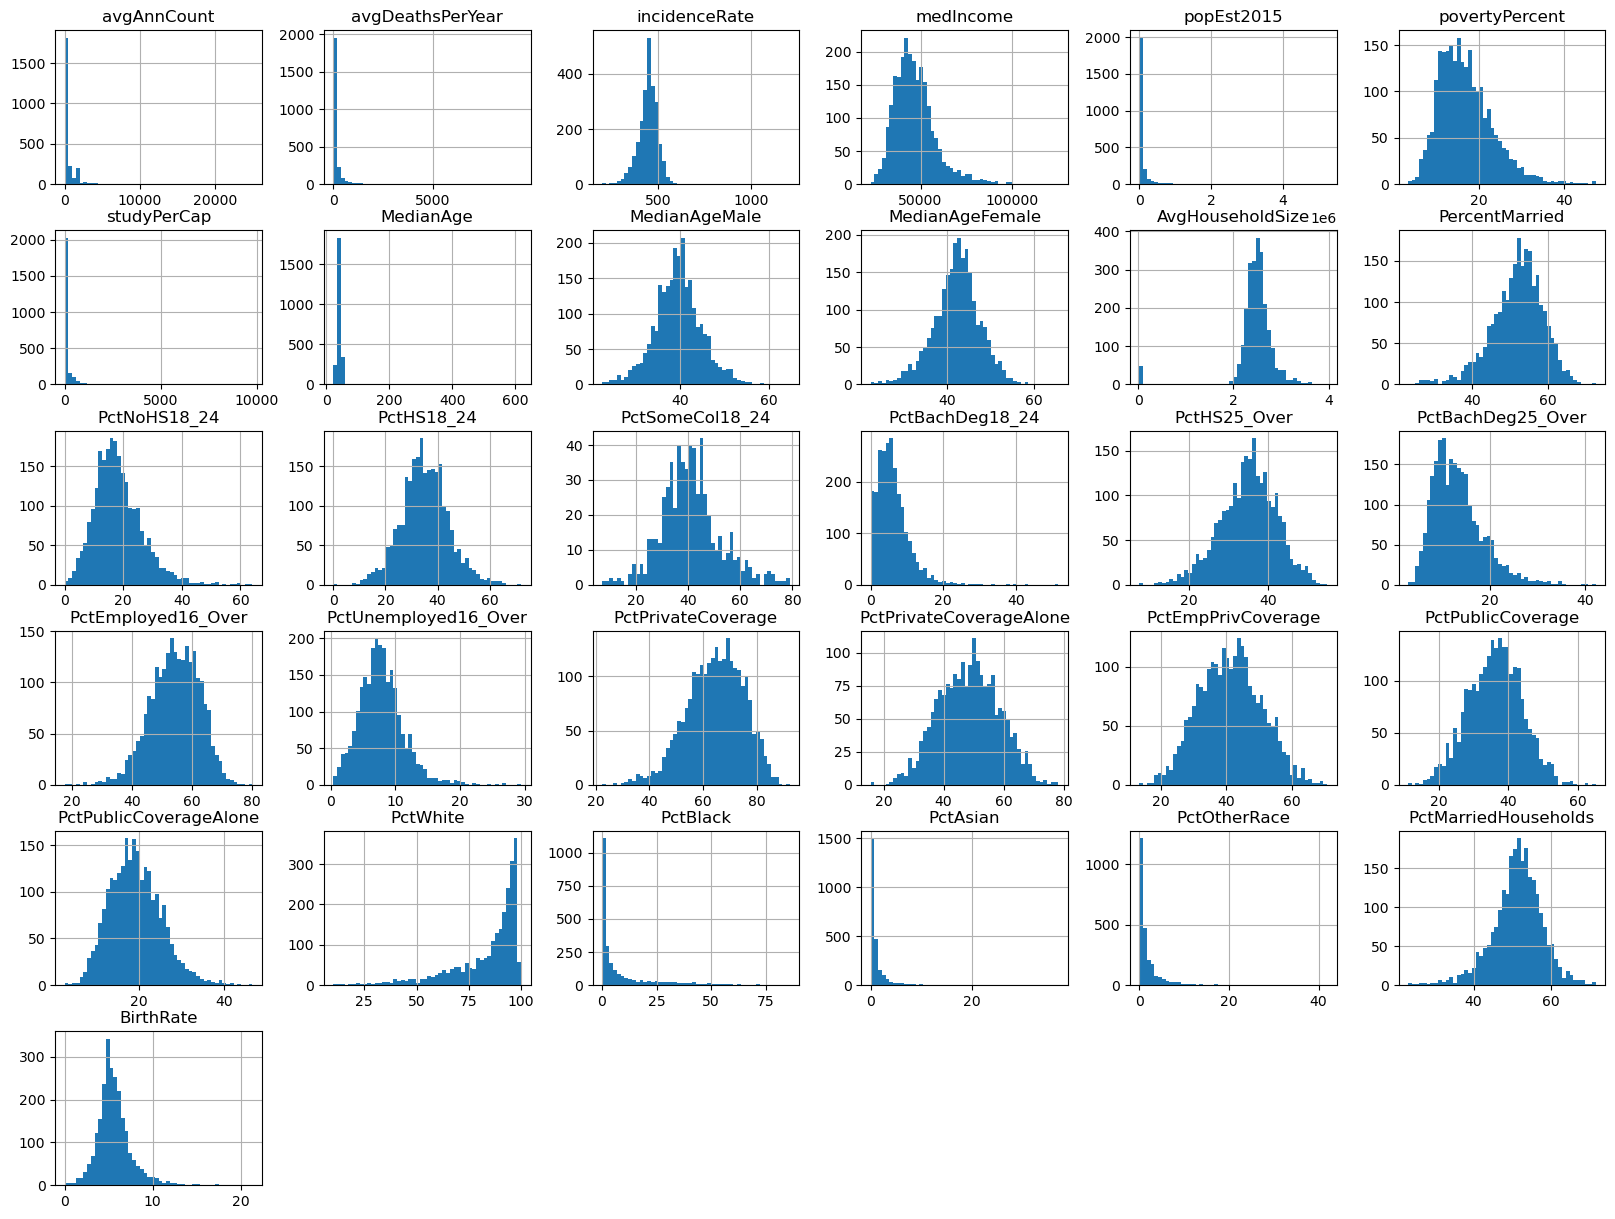

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt

df1.hist(bins=50,figsize=(20,15))

In [65]:
df_targets = pd.read_csv(training_targets_path)
print(df_targets)

      TARGET_deathRate
0                199.5
1                137.1
2                126.9
3                173.8
4                179.8
...                ...
2433             201.5
2434             160.0
2435             160.0
2436             136.2
2437             193.2

[2438 rows x 1 columns]


There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models.


*   There seem to be errors/outliers in the median age features (MedianAge) with values >> 100. This is clearly an error and needs to be corrected prior to fitting regression models. (1.5 marks for code above and this discussion)

In [101]:
correlations = df1.corrwith(df_targets['TARGET_deathRate'])

sorted_correlations = correlations.abs().sort_values(ascending=False)

print(sorted_correlations)

PctBachDeg25_Over          0.491411
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
medIncome                  0.416607
povertyPercent             0.413260
PctHS25_Over               0.409915
PctEmployed16_Over         0.400317
PctPublicCoverage          0.391899
PctPrivateCoverage         0.382786
PctUnemployed16_Over       0.362612
PctPrivateCoverageAlone    0.355050
PctMarriedHouseholds       0.290645
PctBachDeg18_24            0.284566
PctHS18_24                 0.266285
PercentMarried             0.266153
PctEmpPrivCoverage         0.259006
PctBlack                   0.236380
PctSomeCol18_24            0.186140
PctOtherRace               0.182602
PctAsian                   0.181948
PctWhite                   0.174521
avgAnnCount                0.150019
popEst2015                 0.130122
avgDeathsPerYear           0.094048
PctNoHS18_24               0.090565
BirthRate                  0.088543
AvgHouseholdSize           0.045545
MedianAgeMale              0

Top five features with strongest correlations to targets are: PctBachDeg25_Over, incidenceRate, PctPublicCoverageAlone, medIncome and povertyPercent

*   Top five features with strongest correlations to targets are: incidenceRate, PctBachDeg25_Over, PctPublicCoverageAlone, medIncome and povertyPercent (2 marks for this description and code above).


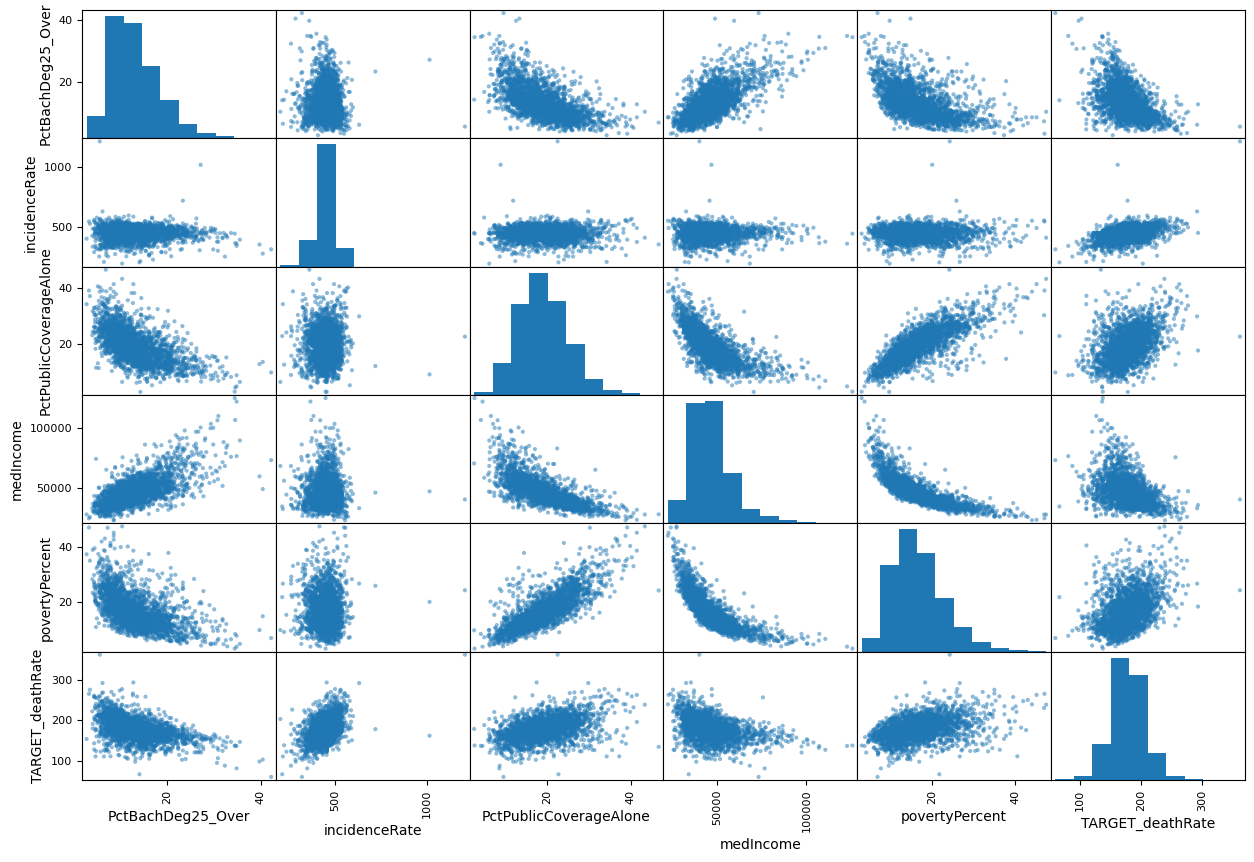

In [102]:
from pandas.plotting import scatter_matrix

N = 5
top_features = sorted_correlations.index[:N]

# Combine the selected features and target variable into a new DataFrame
selected_data = pd.concat([df1[top_features], df_targets], axis=1)

# Plot the scatter matrix
scatter_matrix(selected_data, figsize=(15, 10))
plt.show()

- medIncome and povertyPercent are negatively correlated. 
- PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. 
- povertyPercent and PctBachDeg25_Over are also negatively correlated, indicating that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25.
- povertyPercent has a strong positive correlation with PctPublicCoverageAlone, meaning that poverty stricken counties are less likely to be able to afford private healthcare coverage.

*   medIncome and povertyPercent are negatively correlated to each other as you would expect.
*   povertyPercent and PctBachDeg25_Over are also negatively correlated highlighting that counties with higher degrees of poverty have fewer Bachelor graduates by the age of 25. povertyPercent also shows a strong positive correlation with PctPublicCoverageAlone, indicating that poverty stricken counties are less likely to be able to afford private healthcare coverage.
*   Similarly, PctBachDeg25_Over is negatively correlated with PctPublicCoverageAlone and positively correlated with medIncome. (1.5 marks for discussion of at least two sets of features that show correlations and code above)

**Exercise 3.2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (5 marks)

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


**Exercise 3.3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Report the overall performance of the best regression model identified. Include code for all steps above. (10 marks)